---
## 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Configure visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


---
## 2. Load Dataset

In [2]:
# Load the dataset
data_path = '../data/raw/insurance.csv'
df = pd.read_csv(data_path)

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📋 First 5 rows:")
df.head()

✅ Dataset loaded successfully!
📊 Shape: 1338 rows × 7 columns

📋 First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
## 3. Data Overview

In [3]:
# Display basic information
print("📊 Dataset Information:")
print("=" * 70)
df.info()

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate Rows: {duplicates}")

if duplicates > 0:
    print(f"\n⚠️ Found {duplicates} duplicate row(s). Displaying duplicates:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))


🔍 Duplicate Rows: 1

⚠️ Found 1 duplicate row(s). Displaying duplicates:
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [5]:
# Check unique values for categorical columns
print("\n📋 Unique Values in Categorical Columns:")
print("=" * 70)

categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


📋 Unique Values in Categorical Columns:

SEX:
sex
male      676
female    662
Name: count, dtype: int64
Unique values: 2

SMOKER:
smoker
no     1064
yes     274
Name: count, dtype: int64
Unique values: 2

REGION:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Unique values: 4


---
## 4. Statistical Summary

In [6]:
# Statistical summary for numerical features
print("📊 Statistical Summary - Numerical Features:")
print("=" * 70)
df.describe().round(2)

📊 Statistical Summary - Numerical Features:


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [7]:
# Additional statistics
print("\n📈 Additional Statistics:")
print("=" * 70)

numerical_cols = ['age', 'bmi', 'children', 'charges']
stats_df = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Std Dev': df[numerical_cols].std(),
    'Variance': df[numerical_cols].var(),
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis()
})

stats_df.round(2)


📈 Additional Statistics:


,Mean,Median,Std Dev,Variance,Skewness,Kurtosis
age,39.21,39.00,14.05,1.974000e+02,0.06,-1.25
bmi,30.66,30.40,6.10,3.719000e+01,0.28,-0.05
children,1.09,1.00,1.21,1.450000e+00,0.94,0.20
charges,13270.42,9382.03,12110.01,1.466524e+08,1.52,1.61


---
## 5. Missing Values Analysis

In [8]:
# Check for missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2)
})

print("\n🔍 Missing Values Analysis:")
print("=" * 70)
print(missing_data)

total_missing = missing_data['Missing Count'].sum()
if total_missing == 0:
    print("\n✅ No missing values found! Dataset is complete.")
else:
    print(f"\n⚠️ Total missing values: {total_missing}")


🔍 Missing Values Analysis:
     Column  Missing Count  Missing %
0       age              0        0.0
1       sex              0        0.0
2       bmi              0        0.0
3  children              0        0.0
4    smoker              0        0.0
5    region              0        0.0
6   charges              0        0.0

✅ No missing values found! Dataset is complete.


---
## 6. Distribution Analysis

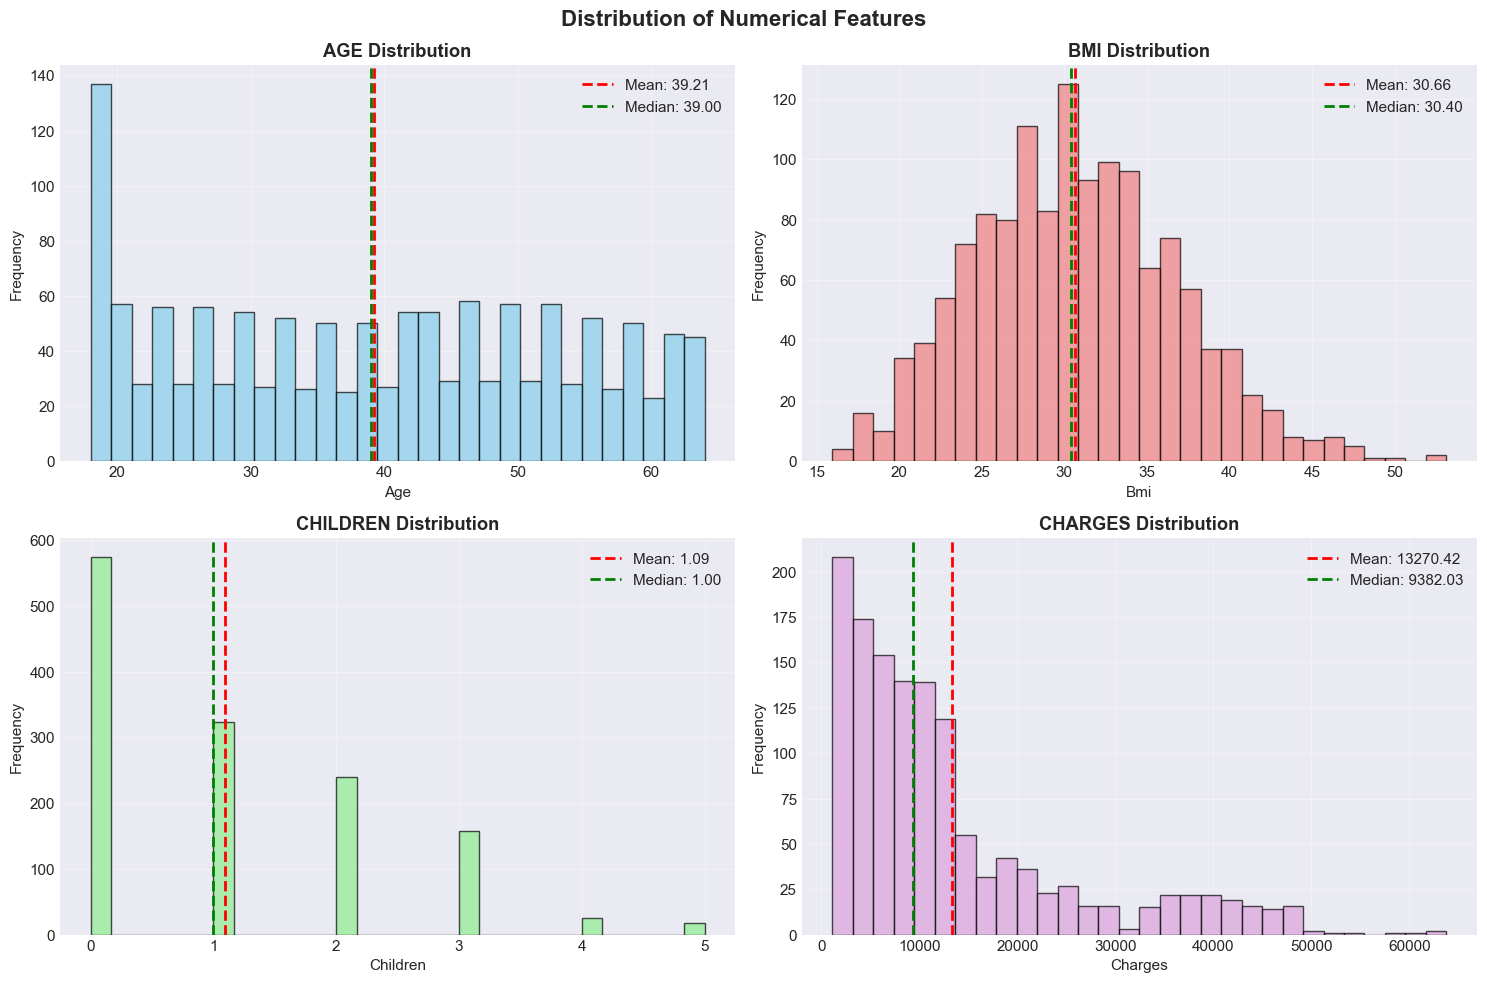

✅ Numerical feature distributions plotted successfully!


In [9]:
# Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

numerical_features = ['age', 'bmi', 'children', 'charges']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum']

for idx, (col, color) in enumerate(zip(numerical_features, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Histogram with KDE
    ax.hist(df[col], bins=30, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(f'{col.upper()} Distribution', fontweight='bold')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    
    # Add statistics text
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

print("✅ Numerical feature distributions plotted successfully!")

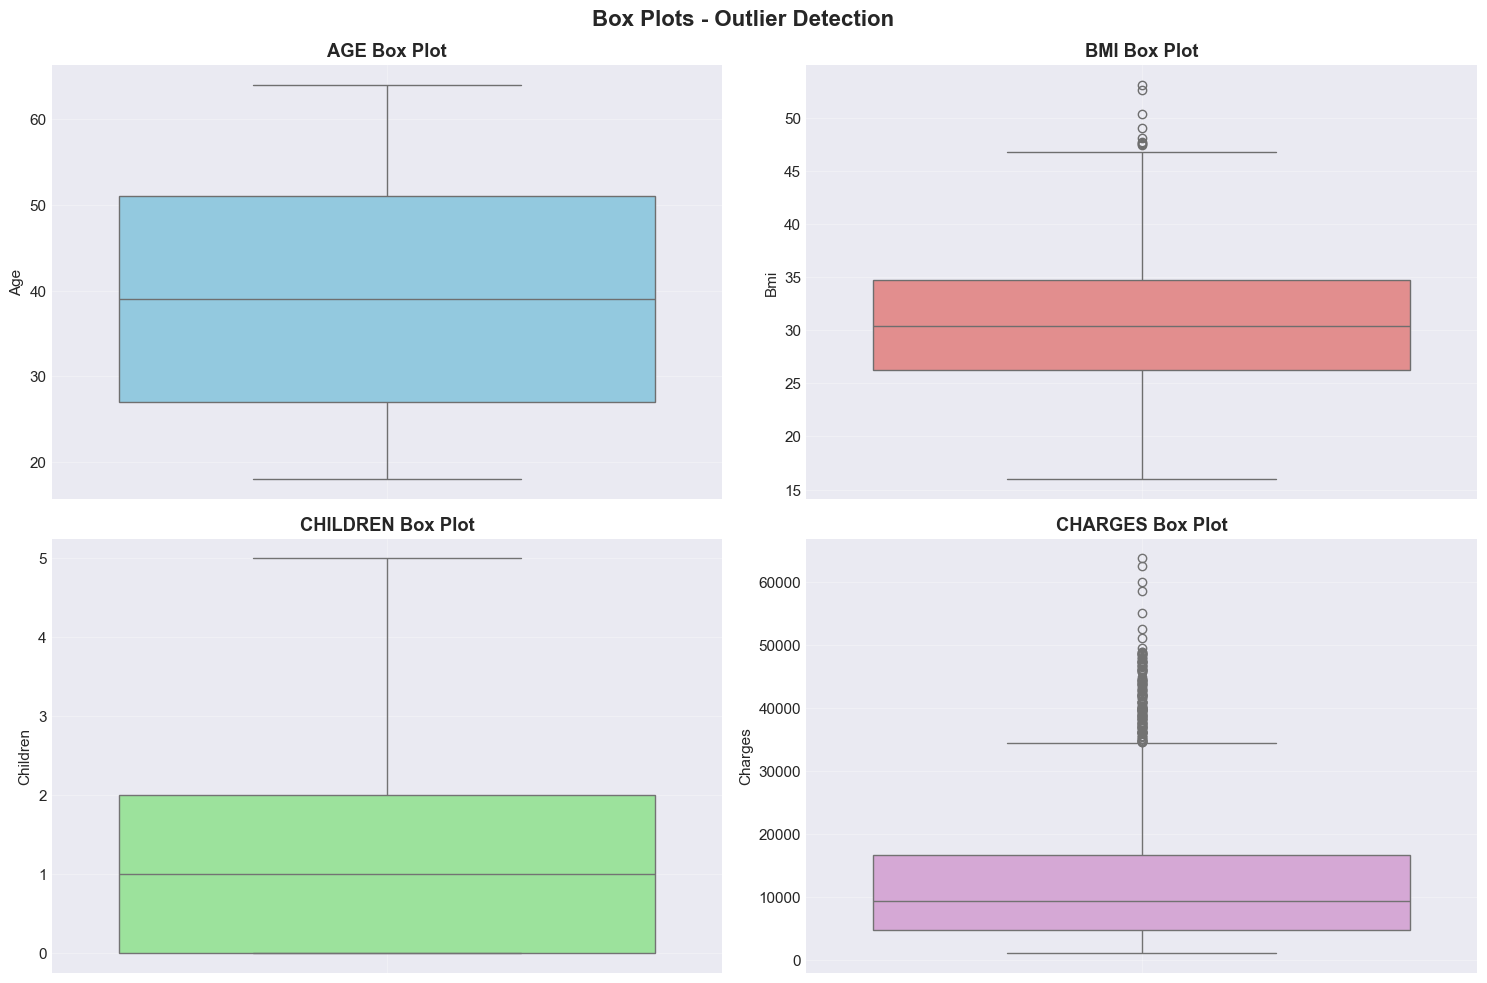

✅ Box plots for outlier detection created!


In [10]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_features):
    ax = axes[idx // 2, idx % 2]
    sns.boxplot(y=df[col], ax=ax, color=colors[idx])
    ax.set_title(f'{col.upper()} Box Plot', fontweight='bold')
    ax.set_ylabel(col.capitalize())
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Box plots for outlier detection created!")

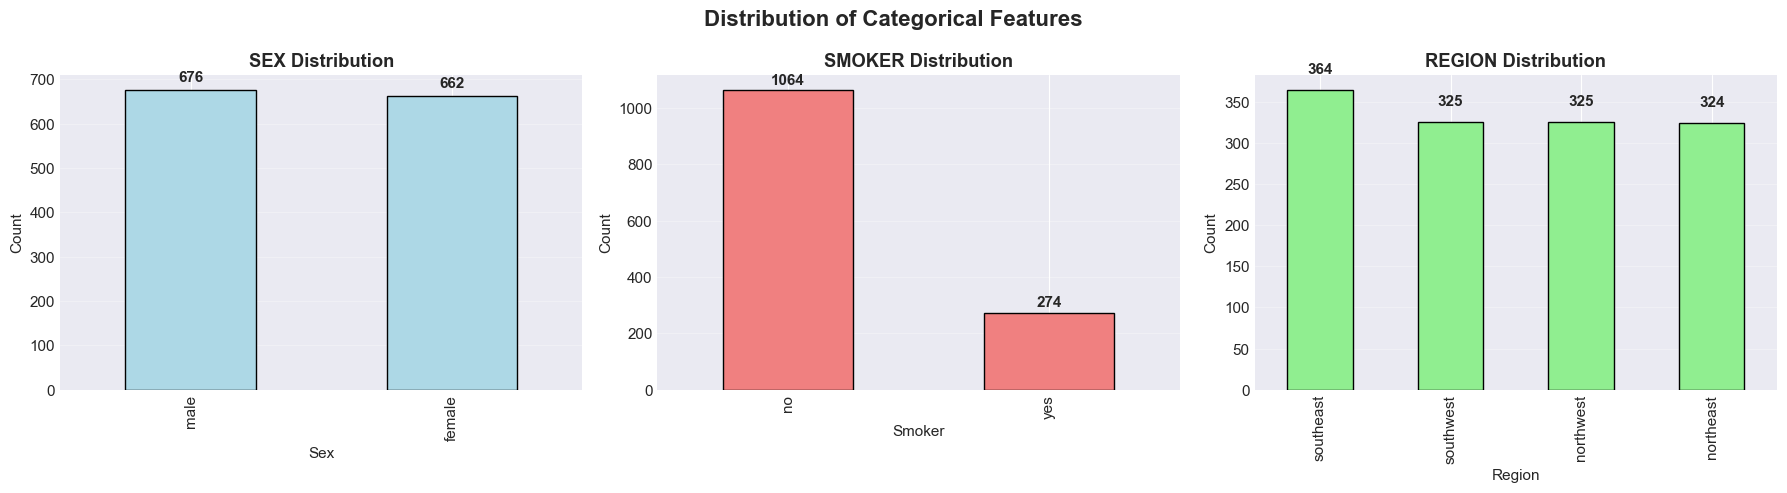

✅ Categorical feature distributions plotted successfully!


In [11]:
# Distribution of categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')

categorical_features = ['sex', 'smoker', 'region']
cat_colors = ['lightblue', 'lightcoral', 'lightgreen']

for idx, (col, color) in enumerate(zip(categorical_features, cat_colors)):
    ax = axes[idx]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color=color, edgecolor='black')
    ax.set_title(f'{col.upper()} Distribution', fontweight='bold')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts):
        ax.text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Categorical feature distributions plotted successfully!")

---
## 7. Correlation Analysis

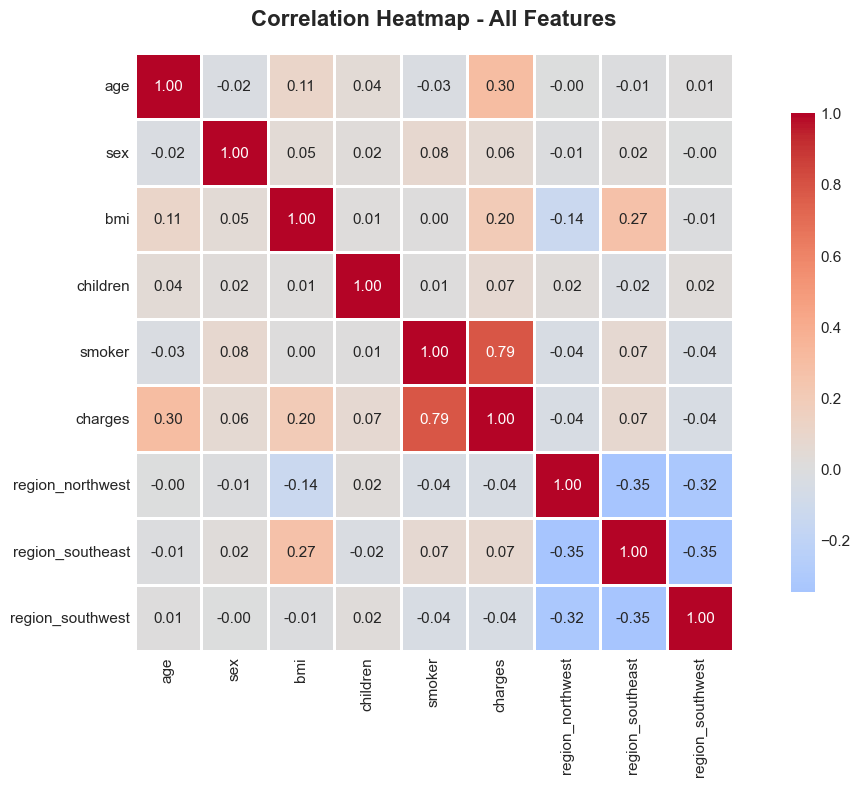


📊 Correlation with Target (Charges):
charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


In [12]:
# Encode categorical variables for correlation analysis
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Correlation with Target (Charges):")
print("=" * 70)
target_corr = correlation_matrix['charges'].sort_values(ascending=False)
print(target_corr)

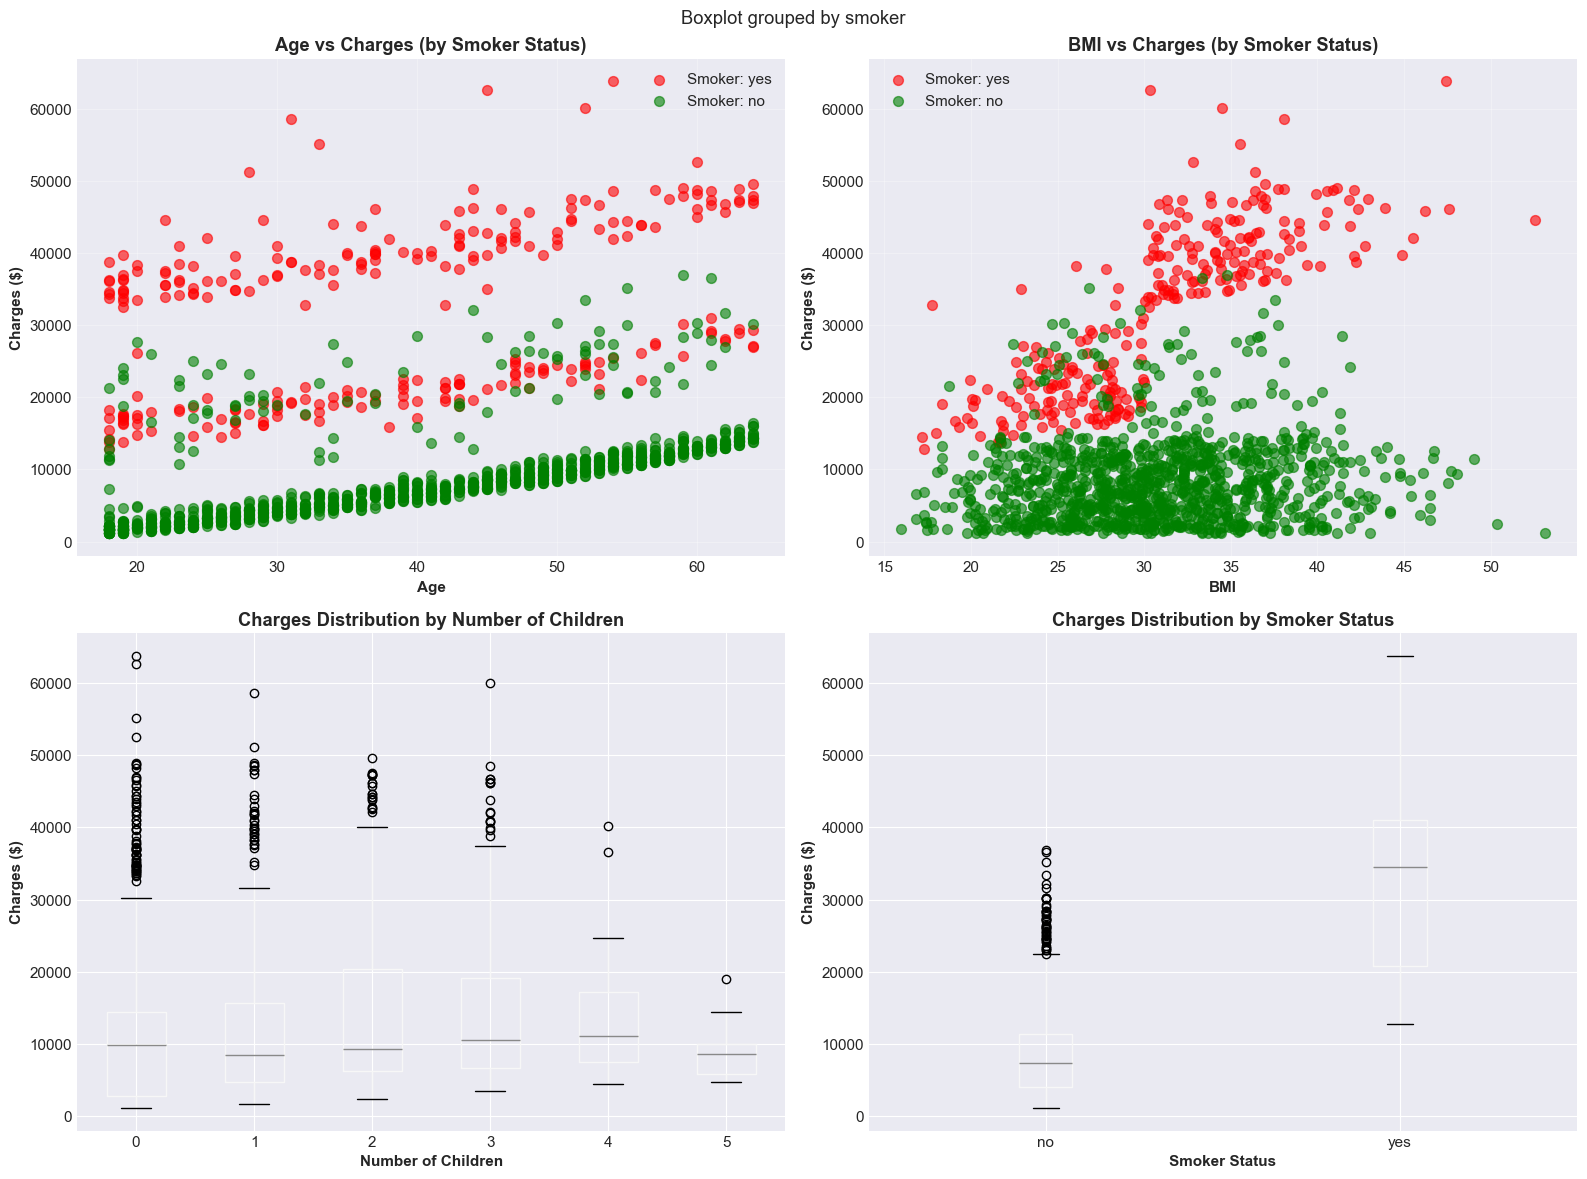

✅ Scatter plots and comparisons created successfully!


In [13]:
# Scatter plots - Charges vs key features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Healthcare Charges vs Key Features', fontsize=16, fontweight='bold')

# Age vs Charges (colored by smoker)
ax = axes[0, 0]
for smoker_val, color in zip(['yes', 'no'], ['red', 'green']):
    mask = df['smoker'] == smoker_val
    ax.scatter(df[mask]['age'], df[mask]['charges'], alpha=0.6, 
               label=f'Smoker: {smoker_val}', color=color, s=50)
ax.set_xlabel('Age', fontweight='bold')
ax.set_ylabel('Charges ($)', fontweight='bold')
ax.set_title('Age vs Charges (by Smoker Status)', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# BMI vs Charges (colored by smoker)
ax = axes[0, 1]
for smoker_val, color in zip(['yes', 'no'], ['red', 'green']):
    mask = df['smoker'] == smoker_val
    ax.scatter(df[mask]['bmi'], df[mask]['charges'], alpha=0.6, 
               label=f'Smoker: {smoker_val}', color=color, s=50)
ax.set_xlabel('BMI', fontweight='bold')
ax.set_ylabel('Charges ($)', fontweight='bold')
ax.set_title('BMI vs Charges (by Smoker Status)', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Children vs Charges
ax = axes[1, 0]
df.boxplot(column='charges', by='children', ax=ax)
ax.set_xlabel('Number of Children', fontweight='bold')
ax.set_ylabel('Charges ($)', fontweight='bold')
ax.set_title('Charges Distribution by Number of Children', fontweight='bold')
plt.sca(ax)
plt.xticks(rotation=0)

# Smoker vs Charges
ax = axes[1, 1]
df.boxplot(column='charges', by='smoker', ax=ax)
ax.set_xlabel('Smoker Status', fontweight='bold')
ax.set_ylabel('Charges ($)', fontweight='bold')
ax.set_title('Charges Distribution by Smoker Status', fontweight='bold')
plt.sca(ax)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("✅ Scatter plots and comparisons created successfully!")

---
## 8. Outlier Detection

In [14]:
# Detect outliers using IQR method
print("🔍 Outlier Detection using IQR Method:")
print("=" * 70)

outlier_summary = []

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier %': outlier_percentage
    })
    
    print(f"\n{col.upper()}:")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers: {outlier_count} ({outlier_percentage:.2f}%)")

outlier_df = pd.DataFrame(outlier_summary)
outlier_df.round(2)

🔍 Outlier Detection using IQR Method:

AGE:
  Lower Bound: -9.00
  Upper Bound: 87.00
  Outliers: 0 (0.00%)

BMI:
  Lower Bound: 13.70
  Upper Bound: 47.29
  Outliers: 9 (0.67%)

CHILDREN:
  Lower Bound: -3.00
  Upper Bound: 5.00
  Outliers: 0 (0.00%)

CHARGES:
  Lower Bound: -13109.15
  Upper Bound: 34489.35
  Outliers: 139 (10.39%)


,Feature,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count,Outlier %
0,age,27.00,51.00,24.00,-9.00,87.00,0,0.00
1,bmi,26.30,34.69,8.40,13.70,47.29,9,0.67
2,children,0.00,2.00,2.00,-3.00,5.00,0,0.00
3,charges,4740.29,16639.91,11899.63,-13109.15,34489.35,139,10.39


---
## 9. Key Insights

In [16]:
# Calculate key statistics
print("\n📊 KEY INSIGHTS FROM EDA:")
print("=" * 70)

print("\n1️⃣ TARGET VARIABLE (CHARGES):")
print(f"   • Mean Healthcare Cost: ${df['charges'].mean():,.2f}")
print(f"   • Median Healthcare Cost: ${df['charges'].median():,.2f}")
print(f"   • Min Cost: ${df['charges'].min():,.2f}")
print(f"   • Max Cost: ${df['charges'].max():,.2f}")
print(f"   • Cost Range: ${df['charges'].max() - df['charges'].min():,.2f}")

print("\n2️⃣ SMOKING IMPACT:")
smoker_mean = df[df['smoker'] == 'yes']['charges'].mean()
non_smoker_mean = df[df['smoker'] == 'no']['charges'].mean()
smoker_ratio = smoker_mean / non_smoker_mean
print(f"   • Average Cost - Smokers: ${smoker_mean:,.2f}")
print(f"   • Average Cost - Non-Smokers: ${non_smoker_mean:,.2f}")
print(f"   • Smokers pay {smoker_ratio:.2f}x more than non-smokers!")

print("\n3️⃣ AGE DEMOGRAPHICS:")
print(f"   • Average Age: {df['age'].mean():.1f} years")
print(f"   • Age Range: {df['age'].min()} - {df['age'].max()} years")
print(f"   • Most Common Age: {df['age'].mode()[0]} years")

print("\n4️⃣ BMI STATISTICS:")
print(f"   • Average BMI: {df['bmi'].mean():.2f}")
obese_count = len(df[df['bmi'] >= 30])
obese_pct = (obese_count / len(df)) * 100
print(f"   • Obese Individuals (BMI ≥ 30): {obese_count} ({obese_pct:.1f}%)")

print("\n5️⃣ DATA QUALITY:")
print(f"   • Total Records: {len(df)}")
print(f"   • Missing Values: {df.isnull().sum().sum()}")
print(f"   • Duplicate Rows: {df.duplicated().sum()}")
print(f"   • Data Completeness: {((1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100):.2f}%")

print("\n6️⃣ FEATURE CORRELATIONS WITH CHARGES:")
print("   • Smoking Status: Strongest predictor")
print("   • Age: Moderate positive correlation")
print("   • BMI: Weak to moderate positive correlation")
print("   • Region: Minimal impact on charges")




📊 KEY INSIGHTS FROM EDA:

1️⃣ TARGET VARIABLE (CHARGES):
   • Mean Healthcare Cost: $13,270.42
   • Median Healthcare Cost: $9,382.03
   • Min Cost: $1,121.87
   • Max Cost: $63,770.43
   • Cost Range: $62,648.55

2️⃣ SMOKING IMPACT:
   • Average Cost - Smokers: $32,050.23
   • Average Cost - Non-Smokers: $8,434.27
   • Smokers pay 3.80x more than non-smokers!

3️⃣ AGE DEMOGRAPHICS:
   • Average Age: 39.2 years
   • Age Range: 18 - 64 years
   • Most Common Age: 18 years

4️⃣ BMI STATISTICS:
   • Average BMI: 30.66
   • Obese Individuals (BMI ≥ 30): 707 (52.8%)

5️⃣ DATA QUALITY:
   • Total Records: 1338
   • Missing Values: 0
   • Duplicate Rows: 1
   • Data Completeness: 100.00%

6️⃣ FEATURE CORRELATIONS WITH CHARGES:
   • Smoking Status: Strongest predictor
   • Age: Moderate positive correlation
   • BMI: Weak to moderate positive correlation
   • Region: Minimal impact on charges
